# Notebook #5: Series temporales: predicción a futuro del parque vehicular; Prophet

In [20]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
from prophet import Prophet

# Importar las clases
# -----------------------------------------------------------------------
import sys
sys.path.append('../..')
from src import soporte_temporales as st
from src import soporte_sarima as ss
from src import soporte_funciones_BBDD as sfbd
from src import soporte_variables_vehiculos as svv

# Modelo Series Temporales
# -----------------------------------------------------------------------
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA



# Visualizar las métricas de error en y_test
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuraciones
# -----------------------------------------------------------------------
pd.options.display.float_format = '{:.0f}'.format
from itertools import product

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Modelo Prophet

In [21]:
df_autos_historicos = sfbd.dbeaver_fetch(sfbd.dbeaver_conexion("proyecto_final"),svv.query_autos_historico)

In [22]:
df_autos_historicos.columns = ['FECHA', 'Vehículos']
df_autos_historicos['FECHA'] = pd.to_datetime(df_autos_historicos['FECHA'].astype(str) + '-12-31')

In [23]:
df_autos_historicos.columns = ['ds', 'y']

In [24]:
df_autos_historicos.set_index('ds', inplace=True)

### Cálculo de baseline

In [25]:
df_autos_historicos['prev'] = df_autos_historicos['y'].shift(1)
df_autos_historicos['ape'] = (df_autos_historicos['prev'] - df_autos_historicos['y']).abs() / df_autos_historicos['y'].astype(float)

In [26]:
train_size = int(0.7 * len(df_autos_historicos))
y_train, y_test = df_autos_historicos[:train_size], df_autos_historicos[train_size:]

In [27]:
y_test['ape'].mean()

0.058173624799626164

    - El MAPE ofrecido por como baseline es de 5.8%. Esto viene de tomar como referencia para la predicción del siguiente año, al año actual.

In [28]:
df_autos_historicos.drop(columns=['prev', 'ape'], inplace=True)
y_train.drop(columns=['prev', 'ape'], inplace=True)
y_test.drop(columns=['prev', 'ape'], inplace=True)

In [29]:
df_autos_historicos.reset_index(inplace=True)

In [30]:
m = Prophet()
m.fit(df_autos_historicos)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=2, freq='Y') 
m.predict(future)

17:43:19 - cmdstanpy - INFO - Chain [1] start processing
17:43:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-12-31,791658,914302,1015609,791658,791658,176292,176292,176292,176292,176292,176292,0,0,0,967949
1,1999-12-31,933372,1073090,1174290,933372,933372,191937,191937,191937,191937,191937,191937,0,0,0,1125308
2,2000-12-31,1075474,1216869,1317431,1075474,1075474,192318,192318,192318,192318,192318,192318,0,0,0,1267793
3,2001-12-31,1217188,1340223,1448113,1217188,1217188,176425,176425,176425,176425,176425,176425,0,0,0,1393613
4,2002-12-31,1347692,1473207,1578693,1347692,1347692,176292,176292,176292,176292,176292,176292,0,0,0,1523984
5,2003-12-31,1478040,1620160,1717619,1478040,1478040,191937,191937,191937,191937,191937,191937,0,0,0,1669976
6,2004-12-31,1608744,1749299,1852813,1608744,1608744,192318,192318,192318,192318,192318,192318,0,0,0,1801063
7,2005-12-31,1739092,1866060,1970583,1739092,1739092,176425,176425,176425,176425,176425,176425,0,0,0,1915517
8,2006-12-31,1869538,1996308,2098833,1869538,1869538,176292,176292,176292,176292,176292,176292,0,0,0,2045830
9,2007-12-31,2037939,2180016,2280808,2037939,2037939,191937,191937,191937,191937,191937,191937,0,0,0,2229875


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
24,2022-12-31,5496546,5449448,5545350
25,2023-12-31,5808183,5759734,5859191
26,2024-12-31,6105369,6053680,6154820
27,2025-12-31,6385468,6332449,6439047
28,2026-12-31,6681328,6627416,6740278


In [39]:
df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df['autos'] = df_autos_historicos['y']
df = df[df['autos'].notnull() & df['yhat'].notnull()]
df.head(5)

,ds,yhat,yhat_lower,yhat_upper,autos
0,1998-12-31,967949,916121,1018541,936083
1,1999-12-31,1125308,1073676,1175970,1090833
2,2000-12-31,1267793,1216678,1319339,1294998
3,2001-12-31,1393613,1337013,1441671,1436165
4,2002-12-31,1523984,1472276,1575104,1611023


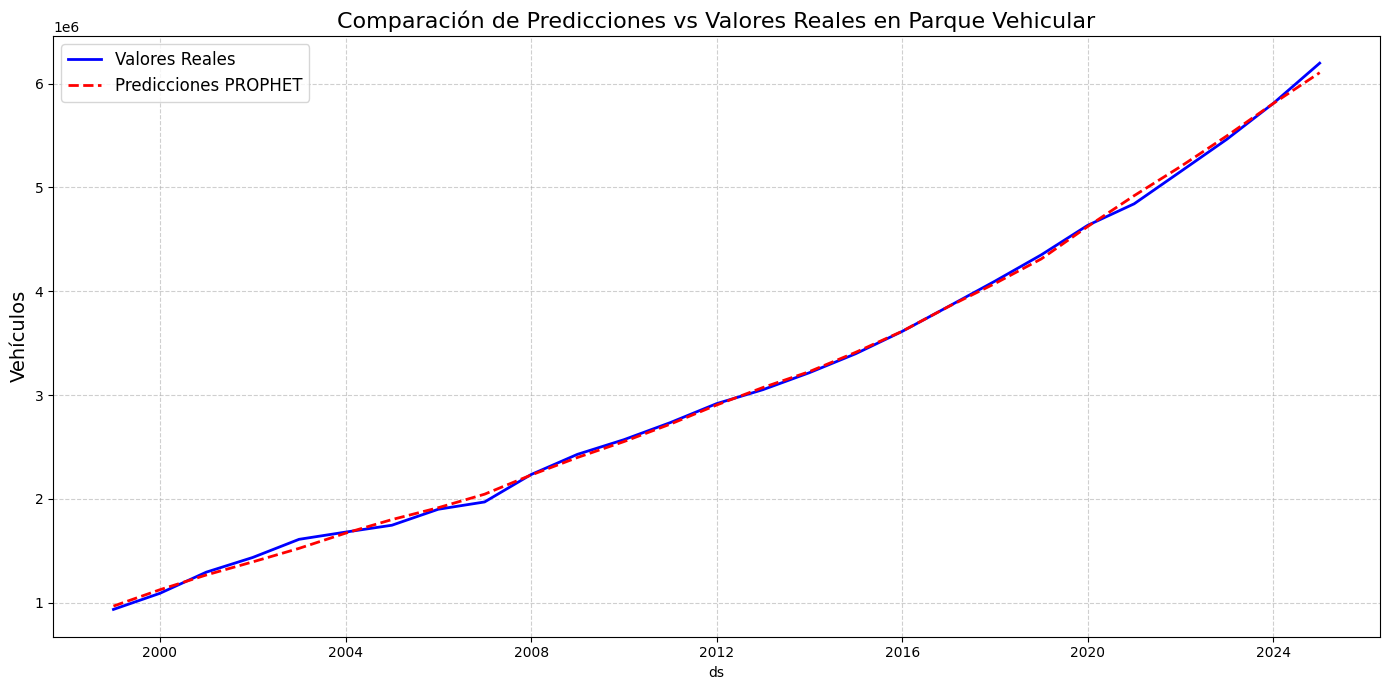

In [41]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x="ds", y="autos", label="Valores Reales", color="blue", linewidth=2) # valores reales
sns.lineplot(data=df, x="ds", y="yhat", label="Predicciones PROPHET", color="red", linestyle="--", linewidth=2) # predicciones
plt.title("Comparación de Predicciones vs Valores Reales en Parque Vehicular", fontsize=16)
plt.ylabel("Vehículos", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6) # formato cuadriculado
plt.tight_layout()
plt.show()

In [34]:
# Seleccionar las columnas relevantes
y_real = df['autos']
y_pred = df['yhat']

# Cálculo de MAE
mae = mean_absolute_error(y_real, y_pred)
mape = mean_absolute_percentage_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Imprimir los resultados
print(f"MAE: {mae}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse}")

MAE: 30809.507597170257
MAPE: 1.35%
RMSE: 40253.777318704335


    - Se puede evidenciar un modelo mucho más ajustado, con resultados más reducidos y que de igual forma siguen el patrón de la serie de datos.

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

## Tendencias

In [36]:
plot_components_plotly(m, forecast)

- En la parte superior, se observa el comportamiento a largo plazo del modelo donde señala una tendencia ascendente. Es decir, el parque vehicular va en aumento.

- En la parte inferior, se muestra la estacionalidad del modelo Esto tendría sentido en caso de tener los valores mensuales. Al no tener estos, se pueden ver dos picos claros: al principio y al final. Esto viene explicado por la tendencia que hemos comentado de aumento a través del tiempo.

In [37]:
predicciones = forecast[['ds', 'yhat']]
predicciones.columns = ['fecha', 'predicciones']
predicciones['year'] = predicciones['fecha'].dt.year
predicciones = predicciones[['year', 'predicciones']]

In [38]:
predicciones.to_csv('../../Datos/datos_predichos/df_parque_vehicular_predicciones.csv')